In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from config import *
from models import Generator, Discriminator, GRelu, JRelu
from torch_datasets import (small_ds, small_dl, sketch_ds, sketch_dl,
                            photo_ds, photo_dl)
from training import train
from utils import (show_batch, show_img, show_samples, plot_losses, 
                   render_samples, sorted_files)

Files already downloaded and verified


## Experiment: Increase D leak to .05

In [12]:
g = Generator().to(device)
d = Discriminator(act=GRelu(leak=.05)).to(device)

output = train(300, photo_dl, sample_freq=10, sample_dir='photo_samples2', 
               d=d, g=g)

Epoch [1/300] 
Batch 202 Metrics:
D loss (real): 0.4821	D loss (fake): 0.0001
G loss: 11.9797

Epoch [16/300] 
Batch 202 Metrics:
D loss (real): 0.0247	D loss (fake): 0.3350
G loss: 7.1250

Epoch [31/300] 
Batch 202 Metrics:
D loss (real): 0.0142	D loss (fake): 2.3343
G loss: 8.5377

Epoch [46/300] 
Batch 202 Metrics:
D loss (real): 0.1855	D loss (fake): 0.2570
G loss: 3.8149

Epoch [61/300] 
Batch 202 Metrics:
D loss (real): 0.3091	D loss (fake): 0.0319
G loss: 3.1188

Epoch [76/300] 
Batch 202 Metrics:
D loss (real): 0.0357	D loss (fake): 0.0787
G loss: 4.5330

Epoch [91/300] 
Batch 202 Metrics:
D loss (real): 0.0253	D loss (fake): 0.0072
G loss: 6.6409

Epoch [106/300] 
Batch 202 Metrics:
D loss (real): 0.0015	D loss (fake): 0.5767
G loss: 7.9326

Epoch [121/300] 
Batch 202 Metrics:
D loss (real): 0.0071	D loss (fake): 0.0712
G loss: 7.0096

Epoch [136/300] 
Batch 202 Metrics:
D loss (real): 0.0024	D loss (fake): 0.0101
G loss: 7.4320

Epoch [151/300] 
Batch 202 Metrics:
D loss (rea

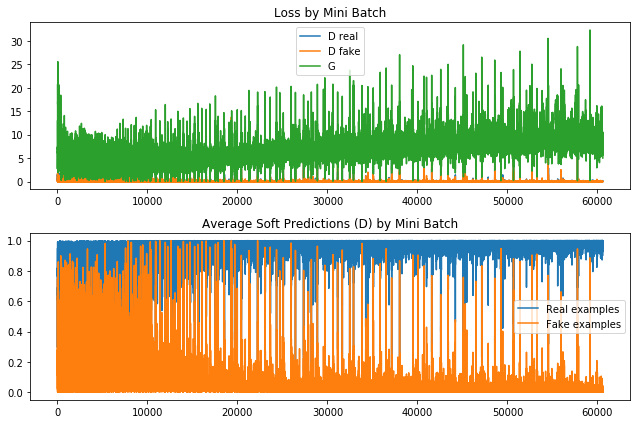

In [13]:
plot_losses(output)

MovieWriter imagemagick unavailable.


Writing file to photos.gif


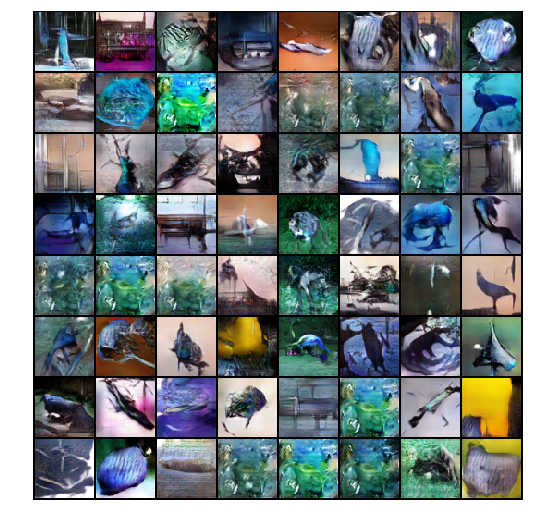

In [17]:
render_samples('photo_samples2', 'photos.gif')

## Experiment: ReLU variant
Found by Jeremy Howard to better preserve mean and variance throughout the model.

In [4]:
g = Generator(act=JRelu).to(device)
d = Discriminator(act=JRelu).to(device)

output = train(200, photo_dl, sample_freq=10, sample_dir='photo_samples3', 
               d=d, g=g)

MovieWriter imagemagick unavailable.


Writing file to photos3.gif


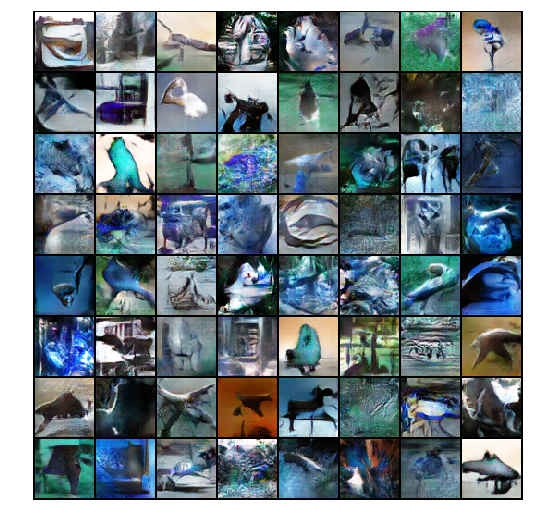

In [8]:
render_samples('photo_samples3', 'photos3.gif')